# Textual inversion fine-tuning for Stable Diffusion using D🧨ffusers

## 1. Imports and dependencies

In [ ]:
!pip install -U -qq git+https://github.com/huggingface/diffusers.git
!pip install -qq accelerate transformers ftfy
!pip install -U -qq --pre triton
!pip install -U -qq xformers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 8.5 MB/s eta 0:00:00


Unzip repository

In [1]:
!unzip diffusion-for-medical-imagery.zip -d .
!find diffusion-for-medical-imagery -maxdepth 1 -exec mv {} /content \;
!rmdir diffusion-for-medical-imagery

Archive:  diffusion-for-medical-imagery.zip
   creating: ./diffusion-for-medical-imagery/
   creating: ./diffusion-for-medical-imagery/demo/
   creating: ./diffusion-for-medical-imagery/core/
  inflating: ./diffusion-for-medical-imagery/LICENSE  
  inflating: ./diffusion-for-medical-imagery/requirements.txt  
  inflating: ./diffusion-for-medical-imagery/dev-requirements.txt  
  inflating: ./diffusion-for-medical-imagery/dev-requirements.in  
  inflating: ./diffusion-for-medical-imagery/.gitignore  
   creating: ./diffusion-for-medical-imagery/.git/
   creating: ./diffusion-for-medical-imagery/data/
  inflating: ./diffusion-for-medical-imagery/requirements.in  
  inflating: ./diffusion-for-medical-imagery/demo/sd_app.py  
  inflating: ./diffusion-for-medical-imagery/demo/__init__.py  
  inflating: ./diffusion-for-medical-imagery/demo/gradio_app.py  
   creating: ./diffusion-for-medical-imagery/core/settings/
  inflating: ./diffusion-for-medical-imagery/core/base_objects.py  
   creating

In [ ]:
import os
import sys

from PIL import Image

sys.path.append(f"{os.getcwd()}/src")

In [ ]:
from core.base_objects import ConceptType
from core.models.sd_with_textual_inversion import StableDiffusionWithTextualInversion
from core.training.textual_inversion.textual_inversion import TextualInversionTrainer
from core.utils import (
    load_json,
    show_image_grid,
    store_images_from_urls,
    CONCEPTS_FOLDER,
)

## 2. Store images

In [ ]:
# Parameters
concept_name = "melanoma"
what_to_teach = ConceptType.OBJECT  # ["object", "style"]
placeholder_token = "<melanoma>"
initializer_token = "skin"  # A word that can summarise what your new concept is, to be used as a starting point

In [ ]:
# Store images
finetuning_images = [
    "https://huggingface.co/datasets/valhalla/images/resolve/main/2.jpeg",
    "https://huggingface.co/datasets/valhalla/images/resolve/main/3.jpeg",
    "https://huggingface.co/datasets/valhalla/images/resolve/main/5.jpeg",
    "https://huggingface.co/datasets/valhalla/images/resolve/main/6.jpeg",
]

store_images_from_urls(finetuning_images, concept_name=concept_name)

In [ ]:
# Check images
images = []
concept_path = f"{CONCEPTS_FOLDER}/{concept_name}"
for file_path in os.listdir(concept_path):
    try:
        image_path = os.path.join(concept_path, file_path)
        images.append(Image.open(image_path).resize((512, 512)))
    except Exception:
        print(
            f"{image_path} is not a valid image, please make sure to remove this file from the directory otherwise the training could fail."
        )

show_image_grid(images, 4, len(images))

Output hidden; open in https://colab.research.google.com to view.

## 3. Training


### 3.1 Initialize trainer

In [ ]:
trainer = TextualInversionTrainer(
    concept_name=concept_name,
    placeholder_token=placeholder_token,
    initializer_token=initializer_token,
)

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:217: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddpm.DDPMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


In [ ]:
trainer.run()

Launching training on one GPU.


/content/src/core/training/textual_inversion/textual_inversion.py:245: FutureWarning: Accessing config attribute `sample_size` directly via 'AutoencoderKL' object attribute is deprecated. Please access 'sample_size' over 'AutoencoderKL's config object instead, e.g. 'unet.config.sample_size'.
  size=self.vae.sample_size,
Steps:   0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:134: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)
Steps:  97%|█████████▋| 1945/2000 [59:27<01:41,  1.85s/it, loss=0.137] 

## 4. Model inference

In [ ]:
model = StableDiffusionWithTextualInversion(concept_name)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
images = model.generate_images(
    prompt="A close-up picture of a <melanoma> formed in the skin of a person",
    n_images=4
)

  0%|          | 0/30 [00:00<?, ?it/s]

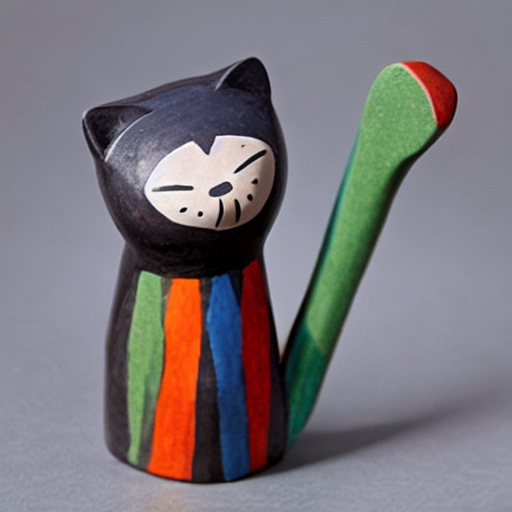

In [ ]:
images[0]

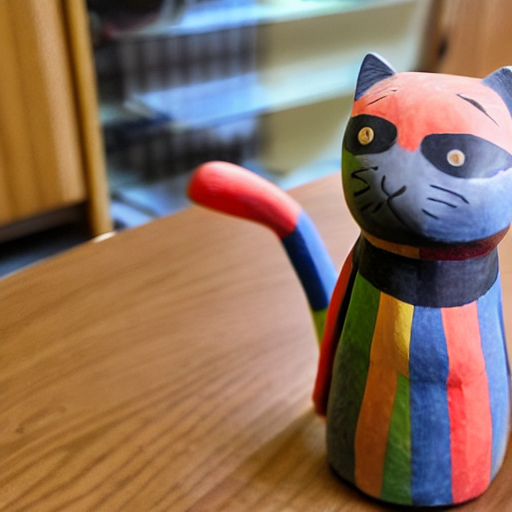

In [ ]:
images[1]

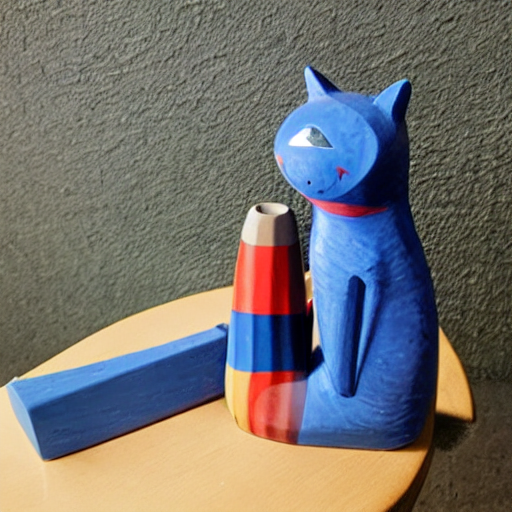

In [ ]:
images[3]